<a href="https://colab.research.google.com/github/lin3372/252_ML.tutorial/blob/main/RL/03_Hands_on_RL_Tabular_SARSA_220801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Hands-On Reinforcement Learning Course: Part 4 - Linear Q learning](https://medium.com/towards-data-science/hands-on-reinforcement-learning-course-part-4-55da5eae851f)

by [Pau Labarta Bajo](https://pau-labarta-bajo.medium.com/?source=post_page-----269b50e39d08--------------------------------), Jan 7, 2022.  [[github repo for this lesson]](https://github.com/Paulescu/hands-on-rl)

Summarized and Revised by Ivan H.P. Lin

Previous RL courses:
Part 1: Introduction to Reinforcement Learning - [datSci](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-1-269b50e39d08), [Ivan's colab](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-1-269b50e39d08)
Part 2: Tabular Q-learning - [datSci](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-1-269b50e39d08), [Ivan's colab](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-1-269b50e39d08)
Part 3: Tabular SARSA - [datSci](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-1-269b50e39d08), [Ivan's colab](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-1-269b50e39d08)

Today we are entering new territory….

A territory where Reinforcement Learning meets the optimization techniques that are essential in modern Machine Learning. A killer combo to solve tons of different problems and environments 🚀.

The problem we will work on is the famous Cart Pole balancing, where the goal is to balance a pole attached to a cart, by moving the cart left and right.

This is how the Deep Q-Agent we will implement at the end of this adventure looks like:

<img src="https://i.makeagif.com/media/9-30-2015/3TntUH.gif" width="60%">

The techniques we will explore in this part are the backbone behind the impressive achievements in the field of Reinforcement Learning in the last 5 to 10 years.

There is a lot of stuff to digest, so we are going to split the workload into 3 parts:

* In part 4 (this one!) we implement a **Linear Q agent** to get an okay-ish solution.
* In part 5 we add depth and implement a **Deep Q agent** to get a good solution.
* In part 6 we will see how to **fine-tune all the hyper-parameters** to maximize performance. Here we finally get the awesome Deep Q agent you saw above!

In each part, we will throw in new ideas, tricks, and implementation details you need to master. More importantly, I want you to get used to failing when building RL solutions. Because this is what happens most of the time.

Advanced RL techniques, like the ones we will see in these 3 parts, are very powerful but require careful implementation and hyper-parameter tuning.

Debugging RL algorithms is not an easy task, and the only way to become better at it is by making mistakes. One of my biggest frustrations, when I started learning Reinforcement Learning, was the apparent simplicity of the algorithms, and the extreme difficulty when trying to replicate published results.

Reinforcement Learning is hard by itself, so let’s try not to overcomplicate it even more. Let’s go step by step!

All the code for this lesson is in [this Github repo](https://github.com/Paulescu/hands-on-rl). Git clone it to follow along with today’s problem

And don’t forget to give it a ⭐!

# 0. Contents

1. The Cart Pole problem 🕹️
2. Environment, actions, states, rewards
3. Random agent baseline 🤖 🍸
4. Parametric Q-learning
5. Hello PyTorch! 👋
6. Linear Q agent 🤖
7. Recap ✨
8. Homework 📚
9. What’s next? ❤️

#1.. The Cart Pole problem 🕹️

A pole is attached to a cart with an un-actuated joint. And your goal is to move the cart position, left and right, to prevent the pole from falling.

We will use the implementation of the ```CartPole-v1``` you can find in the [OpenAI Gym](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py).

### Why this problem?

So far in the course, we have used 
  - **classical Reinforcement Learning** algorithms, 
  - **Q-learning** (part 2), and 
  - **SARSA** (part 3) in a discrete/tabular environment.

Today’s problem is slightly more complex because its state space is too large to be discretized. Instead, we need to level up our game and use more powerful RL algorithms.

We will use **parametric Q-learning**, a technique that combines 
* the classic Q-learning we saw in part 2, 
* with parametric approximations, 
  - either **linear ones** (here in part 4) or,
  - a more complex one like **neural nets** (in part 5).

Parametric Q-learning using neural nets (aka **Deep Q-learning**) lies behind many recent breakthroughs in Reinforcement Learning, like the famous [Atari game player by DeepMind](https://arxiv.org/pdf/1312.5602v1.pdf).

Let’s get familiar with the specifics of this environment!






### download util files from github

In [37]:
import os
user = "Paulescu"
repo = "hands-on-rl"
src_dir = "03_cart_pole/src/"
pyfiles = ["agent_memory.py", "config.py", "loops.py", "model_factory.py", "optimize_hyperparameters.py",\
           "q_agent.py", "random_agent.py", "supervised_ml.py", "utils.py", "viz.py"]
### Note - For "viz.py" there is an error in get_action(), so I fixed it and put in my respoitory =, needs to download tehe viz.py from my github repository

curr_dir=os.getcwd()
os.makedirs('src', exist_ok=True)

os.chdir('src')

for f_rl in pyfiles:
  url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{f_rl}"
  !wget --no-cache --backups=1 {url}

##########################   
#user = "lin3372"
#repo = "252_ML.tutorial"
#src_dir = "RL/src/02_mountain_car/src"
#pyfiles = ["viz.py"]

#for f_rl in pyfiles:
#  url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{f_rl}"
#  !wget --no-cache --backups=1 {url}
########################## 

os.chdir(curr_dir)

--2022-08-11 05:32:21--  https://raw.githubusercontent.com/Paulescu/hands-on-rl/main/03_cart_pole/src//agent_memory.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /Paulescu/hands-on-rl/main/03_cart_pole/src/agent_memory.py [following]
--2022-08-11 05:32:21--  https://raw.githubusercontent.com/Paulescu/hands-on-rl/main/03_cart_pole/src/agent_memory.py
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 581 [text/plain]
Saving to: ‘agent_memory.py’

agent_memory.py     100%[===================>]     581  --.-KB/s    in 0s      

2022-08-11 05:32:21 (21.6 MB/s) - ‘agent_memory.py’ saved [581/581]

--2022-08-11 05:32:21--  https://raw.githubusercontent.com/Paulescu/hands-on-rl/

### display setup for colab
reference stackoverflow - [How to render OpenAI gym in google Colab? ](https://stackoverflow.com/questions/50107530/how-to-render-openai-gym-in-google-colab)

In [38]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [39]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [40]:
# then import all your libraries, including *matplotlib* & *ipythondisplay*:

import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [41]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In practice, this is not true. Both $v$ and $ω$ have narrower intervals, but this is something you cannot directly read from the ```env``` object. You can only observe their real ranges as your agent explores the environment.

This is important because the models we will use today, and in part 5, work best with **normalized inputs**. In this case, normalized states. And to normalize a number you need to know first its max and min values. These 2 values for $v$ and $ω$ cannot be read from the ```env.observation_space``` . You need to estimate them using a bit of exploration.

The whole point of this note is:

* ⚠️ do not blindly take the values in ```env.observaton_space``` as the real ranges for each state.

#2.. Environment, actions, states, rewards 👉🏽 
[notebooks/00_environment.ipynb](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/notebooks/00_environment.ipynb)



The state is represented by 4 numbers:

* The cart position $x$ from $[-2.4, 2.4]$.
* The cart velocity **$v$**
* The pole angle $θ$ with respect to the vertical from $-12$ to $12$ degrees (from $-0.21$ to $0.21$ in radians)
* The pole angular velocity $ω$. This is the rate of change of $θ$.

<figure><center>
<img src="https://miro.medium.com/max/461/1*VZcW5MKAkp2P2uqZ_-o53w.jpeg" width="60%">
<figcaption>Cart pole state vector (Image by the author)</figcaption>
</center></figure>

An episode terminates when either:

* the cart goes beyond the limits: $x > 2.4$ or $x < -2.4$
* the pole is too far from the vertical: $θ > 12$ degrees or $θ < -12$ degrees.
* or we reached the maximum number of episodes steps, $500$. In this case, the agent perfectly solved the episode.

The starting state is sampled randomly from the interval $[-0.05, 0.05]$ for each state. Sometimes, the starting position is so close to balance that the episode is easy. Other times, the starting position is so off-balance that the episode is much harder to solve, and sometimes even impossible.

What about the **cart velocity $v$** and the pole **angular velocity $ω$**. Are these values bounded too?

👉Before you solve a Reinforcement Learning problem you need to define what are
* the actions
* the states of the world
* the rewards

👉We are using the ```CartPole-v0``` environment from [OpenAI's gym](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

👉```CartPole-v0``` is not an extremely difficult environment. However, it is complex enough to force us level up our game. The tools we will use to solve it are really powerful.

👉Let's explore it!

### Load the environment 

In [42]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [43]:
## Load the environment 
import gym
env = gym.make('CartPole-v1')

If you look at the OpenAI gym interval variables ```env.observation_space.low``` and ```env.observation_space.high``` you will see that these 2 numbers seem to be arbitrarily large or small.

In [44]:
## The state consists of 4 numbers:
x_min, v_min, angle_min, angular_v_min = env.observation_space.low
x_max, v_max, angle_max, angular_v_max = env.observation_space.high

print(f'Cart position from {x_min:.2f} to {x_max: .2f}')
print(f'Cart velocity from {v_min:.2E} to {v_max: .2E}')
print(f'Angle from {angle_min:.2f} to {angle_max: .2f}')
print(f'Angular from {angular_v_min:.2E} to {angular_v_max: .2E}')

Cart position from -4.80 to  4.80
Cart velocity from -3.40E+38 to  3.40E+38
Angle from -0.42 to  0.42
Angular from -3.40E+38 to  3.40E+38


In [45]:
# env.reset()
# frame = env.render(mode='rgb_array')

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.axes.yaxis.set_visible(False)
# min_x = env.observation_space.low[0]
# max_x = env.observation_space.high[0]
# ax.imshow(frame, extent=[min_x, max_x, 0, 8])

### **actions**

What about the actions our agent can perform?

* 0 : Push the cart to the left.
* 1 : Push the cart to the right.

### **rewards**

The **reward** is +1 for every step taken. This means that the longer the agent keeps the pole standing, the higher the cumulative reward.

# 3.. Random agent baseline  👉🏽 
[01_random_agent_baseline.ipynb](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/notebooks/01_random_agent_baseline.ipynb)

👉Before you try to solve a Reinforcement Learning problem you should get a grasp of its difficulty.

👉 To do so, you need to design a dummy agent that can peform the task without much brains, and evaluate its performance.

👉A simple way to do so is by using a Random Agent, that chooses its next action randomly, without paying attention at the current state of the environment.

In [46]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [47]:
import gym
env = gym.make('CartPole-v1')

## Random agent 🤖

As usual, we use a ```RandomAgent``` to establish a baseline performance.

In [48]:
# If this import fails, run this in your shell and relaunch jupyter:
# `export PYTHONPATH=".."`
from src.random_agent import RandomAgent
agent = RandomAgent(env)

## Evaluate the agent ⏱️

We evaluate this agent using 1,000 episodes

In [49]:
from src.loops import evaluate
n_episodes = 1000
rewards, steps = evaluate(agent, env, n_episodes)

100%|██████████| 1000/1000 [00:00<00:00, 1803.12it/s]


to compute the average reward and its standard deviation.

In [50]:
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 22.28, std 11.67


## How far we got in each attempt

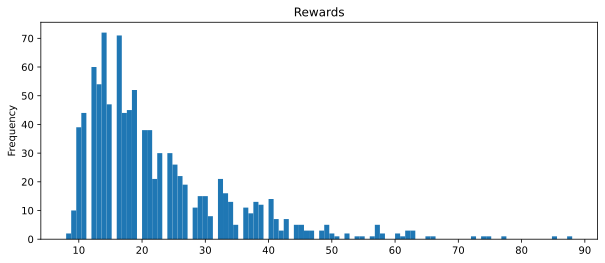

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()


## see our agent in action 🎬

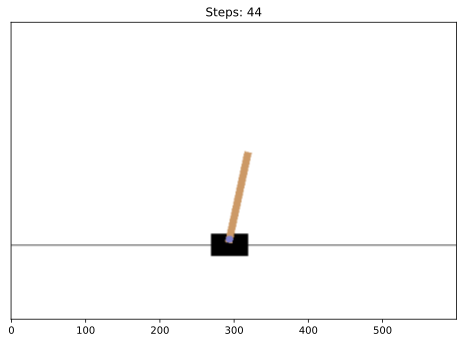

In [52]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=0)

# 4.. **Parametric $Q$-learning**



So far in the course, we have worked in discrete/tabular environments (in part 2) or transformed the original environment into a discrete one (part 3).

However, most interesting environments are not discrete, but continuous, and too large to be discretized and solved.

Fortunately, there are RL algorithms that directly work on continuous state spaces.

Today we are going to use **Parametric $𝐐$-learning**. This algorithm is analogous to the original **$Q$-learning** we saw in part 2 but adapted to work on a continuous setting.

The state-space for the ```CartPole``` consists of 4 continuous numbers

$$state = (x, v, \theta, w)$$

where

* $x$ is the cart position
* $v$ is the cart velocity
* $θ$ is the pole angle
* $ω$ is the pole angular velocity

In a continuous state space like this, the optimal **$Q$-value** function

$$Q^*(s,a)$$

cannot be represented as a table (because it would have an infinite number of dimensions).

Instead, we represent it in using a parametric form

<img src="https://miro.medium.com/max/1050/1*KjS5N4_KnYjeCtR1jYUD4Q.png" width="50%">

where

* **$Q^*$** is a model architecture, like a linear model, or a very deep feed-forward neural network.
* that depends on a set of parameters we will estimate using the experiences $(s, a, r, s’)$ the agent collects during training.

$$P=(p_o, p_1, \cdots, p_m) $$

The choice of **model architecture for $Q^*$ is critical** to learning a good policy and solving the problem.

The more parameters the model has, the more flexible it is. And higher the chances are it is a good model for the problem. As a matter of fact, **linear models** are just a special case of neural networks, without intermediate layers.

Today we are going to use a linear model, to keep things simple, and in the next lecture, we will introduce a **deeper** (i.e more layers) **neural network model** to improve the performance.

Once you pick the model architecture for *$Q^*$*, you need to find the optimal parameters $P$.

## How do learn the **vector parameter $P$**?

We need a method to iteratively find better estimates of these parameters **$P$** as the agent collects more experiences during training, and converge to the optimal parameters $P^*$

$$P^0 → P^1 → P^2 \cdots → P^N ≈ P^*$$

Now, the function $Q^*(s, a, P)$ satisfies the **Bellman optimality** equation, a key equation in Reinforcement Learning

<figure><center>
<img src="https://miro.medium.com/max/1050/1*mgptxy7-CoKGKEFRC1bK5A.png" width="60%">
</center></figure>

that tells us that the maximum future reward $Q^*(s, a, P)$ is the reward $r$ the agent receives for entering the current state $s$ plus the maximum future reward for the next state $s’$ .

The optimal parameters $P^*$ are those that bring the left-hand side of this equation as close as possible to the right-hand side.

This is an optimization problem that you can solve with modern Machine Learning techniques. More precisely, **Supervised Machine Learning** techniques.





## **Supervised Machine Learninig, SGD (Stochastic Grdient Descent)**

A supervised ML problem has 3 ingredients:

1. the input ```features``` and corresponding ```targets```
2. a set of ```parameters``` we need to determine
3. a model architecture that depends on these ```parameters``` and that maps ```features``` to ```model outputs```

The goal is to find the ```parameters``` that make the model outputs match the target values.

<figure><center>
<img src="https://miro.medium.com/max/1050/1*lHGuetwYQXj5Ub6thAlYOQ.png" width="60%">
</center></figure>

In other words, we want to find the parameters $P^*$ that **minimize the distance**, aka **loss** in the ML jargon.

<figure><center>
<img src="https://miro.medium.com/max/1050/1*dIeH_LcVAuqzijM4EaeXDA.png" width="66%">
</center></figure>

A classic algorithm to solve this optimization problem in the Machine Learning world is the **stochastic gradient descent** (**SGD**) method. More precisely, the **mini-batch stochastic gradient** descent.

Given your current estimate $P^o$, a mini-batch of experiences $(s, a, r, s’)$ and a suitable **learning rate** you can refine your estimation $P^o$ with the **SGD** update formula

<figure><center>
<img src="https://miro.medium.com/max/1575/1*ry6mqD7cSSjfIbVY41on-Q.png" width="66%">
<figcaption>SGD update formula</figcaption>
</center></figure>

The gradient of the loss with respect to the parameters, $\nabla L$, is a vector whose components are the sensitivities of the loss with respect to each of the components in the vector of parameters.

In practice, you will never need to compute gradients yourself. Python libraries like PyTorch or TensorFlow do it for you, using an algorithm called **back-propagation**, which is just a fancy name for the chain rule in calculus you might have learned years ago in high school.

To recap:

* As our agent explores the environment, you collect batches of experiences, and you use these to update the parameters using the SGD update formula.

* If you repeat this long enough, you will (hopefully 🤞) get to the optimal parameters $P^*$, and hence the **optimal $Q^*$** value function.

* From the optimal **$Q^*$** function you can derive the optimal policy

$$\pi ^*(s) =  \text{optimal action is state }s$$


Voila! This is how Parametric Q-learning works!

## **Convergence of SGD** in Supervised ML 👆

As opposed to the tabular setting, where there are strong guarantees that **$Q$-learning** works, things are more fragile in the parametric version.

Essentially, what causes things to break is that the target values of our optimization problem

<figure><center>
<img src="https://miro.medium.com/max/1575/1*rDKHHuJmbAKru3xsj98xjA.png" width="50%">
</center></figure>

change as we update the parameter estimates. The targets change during training. They move 🏃

This apparently minor detail is what makes the problem harder to solve.

Hopefully, researchers got creative and introduced a few tips and tricks ✨ to solve the problem.

### Trick 1: Slower update of the targets ✨

If moving targets is an issue, can we try to move them less?

The answer is yes. And we can do it by using 2 different vectors of parameters:

* **P**: parameters for the main model (left-hand side). These are adjusted after each SGD update. As expected.
* **Pᵀ**: parameters of the target model (right-hand side). These parameters are kept fixed during the SGD update, and we only reset them to match the ones in **P** every $N$-th iteration.

<figure><center>
<img src="https://miro.medium.com/max/1575/1*sJ3X7PlQ9-75d5io1j7wCQ.png" width="68%">
</center></figure>

The frequency of update of **Pᵀ** is a hyper-parameter we will need to tune.


### Trick 2: Replay memory ✨

**$Q$-learning** is an offline algorithm. This means the Bellman equation holds for any agent experience $(s, a, r, s’)$, no matter which policy the agent followed.

Hence, **past experiences can be grouped in batches** and used to update parameters with the SGD update.

Creating batches of data like this **removes the correlation** between experiences, and this is especially useful to train neural network models faster.

How many experiences should we store in this memory?

This number (aka the **memory size**) is a hyper-parameter that we will need to tune.

### Hyper-parameters tuning

Tunning hyper-parameters is not an art, but a science.
We will see in part 6 how to do it using the very popular Python library [Optuna](https://github.com/optuna/optuna)

Finally, if you have already built neural network models with the PyTorch library you can skip the next section. Otherwise, let me introduce you to your next best friend 🤓

# 5.. Hello PyTorch! 👋

PyTorch is a Python library that lets you train differentiable models, including linear models and neural networks.

**PyTorch** is going to be **THE** library we will use for the rest of the course for the kind of Supervised ML problems we need to solve in Parametric Reinforcement Learning algorithms, like **Parametric $Q$-learning**.

PyTorch has a very Python interface (as opposed to Tensorflow) and I am sure you will pick it up fast.

* The key feature behind PyTorch is its **automatic differentiation engine**, which computes for us the gradients we need to update the model parameters.


The main building blocks of a training script in PyTorch are:

👉 A batch of **input data**, containing the **features** and the **target**.

👉 The **model definition** encapsulated as a Python object ```torch.nn.Module``` You only need to implement the forward pass, i.e. the mapping from inputs to outputs. For example,

<figure><center>
<img src="https://miro.medium.com/max/1575/1*Jsjy5tem-AackJj3QWnBdQ.png" width="60%">
</center></figure>

👉 A **loss function**, for example, ```torch.nn.functional.mse``` (mean squared error) that computes the loss given the model output and the target.

👉 An **optimizer**, like ```torch.optim.Adam``` (a sophisticated version of SGD) that adjusts the model parameters to decrease the loss function on the batch input data.

These 4 ingredients are combined in a loop, aka the **training loop** of a Supervised Machine Learning problem.

<figure><center>
<img src="https://miro.medium.com/max/1575/1*QjE82ha_cJi3CGZvkb1mIQ.png" width="60%">
</center></figure>

At the end of this script, if your ```model``` architecture is appropriate for the data, your ```model``` parameters will be such that the ```model_output``` is very very close to the target values

$$model(features) \approx target$$

This is how you solve a parametric function approximation with PyTorch.

Enough talking. Let’s move to the code and implement a Linear Q agent!

# 6.. Linear Q agent

We use the following model to map input states to **$q$-value** functions (aka our $q$ function):

<figure><center>
<img src="https://miro.medium.com/max/711/1*g6KgxrSVAYlGZO7AK1q7Gg.jpeg" width="30%">
<figcaption>self.q_net</figcaption>
</center></figure>

<figure><center>
<img src="https://miro.medium.com/max/1575/1*FeLGvuDA65IaAPTJvqIqhw.png" width="70%">
</center></figure>

The number of parameters is equal to the number of connections between the inputs and the output cells (i.e. $4 x 2 = 8$) plus $2$ bias terms we usually add to these linear layers to augment their expressiveness. This gives a total of $10$ parameters.

  > This is not a very flexible model, but it is enough for today. In the following lecture, we are going to use more powerful neural network models.🤑

Now, let’s go to the hyperparameters…

I created 2 notebooks. One with bad hyper-parameters and the other with good ones.

## Bad hyper-parameters
[02_linear_q_agent_bad_hyperparameters.ipynb](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/notebooks/02_linear_q_agent_bad_hyperparameters.ipynb)


In [53]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


### Environment 🌎

In [54]:
import gym
env = gym.make('CartPole-v1')

### Hyperparameters

In [55]:
# Bad hyper-parameters
hparams = {
    'learning_rate': 9.214691713730938e-05,
    'discount_factor': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 16,
    'freq_steps_update_target': 1000,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 1,
    'max_grad_norm': 1,
    'normalize_state': True,
    'epsilon_start': 0.9,
    'epsilon_end': 0.08474621504763855,
    'steps_epsilon_decay': 100000
}

SEED = 4291201652

#### ⚠️ Fix random seeds
We fix all random seeds to ensure reproducibility

In [56]:
from src.utils import set_seed
set_seed(env, SEED)

### QAgent
Then we create the ```QAgent``` object

In [57]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

10 parameters


### Train the agent 🏋️
and we train it for 2,000 episodes:

In [58]:
from src.loops import train
train(agent, env, n_episodes=2000)

 12%|█▏        | 237/2000 [00:00<00:07, 249.58it/s]

Reward mean: 9.64, std: 0.83
Num steps mean: 9.64, std: 0.83


100%|██████████| 100/100 [00:00<00:00, 1083.75it/s]


Reward mean: 9.63, std: 0.82
Num steps mean: 9.63, std: 0.82


 31%|███▏      | 629/2000 [00:02<00:07, 175.29it/s]

Reward mean: 9.63, std: 0.82
Num steps mean: 9.63, std: 0.82


 41%|████▏     | 825/2000 [00:03<00:06, 178.24it/s]

Reward mean: 9.63, std: 0.82
Num steps mean: 9.63, std: 0.82


 52%|█████▏    | 1034/2000 [00:04<00:04, 216.74it/s]

Reward mean: 9.64, std: 0.82
Num steps mean: 9.64, std: 0.82


 63%|██████▎   | 1255/2000 [00:05<00:02, 254.51it/s]

Reward mean: 9.64, std: 0.82
Num steps mean: 9.64, std: 0.82


 72%|███████▏  | 1443/2000 [00:06<00:02, 235.78it/s]

Reward mean: 9.64, std: 0.82
Num steps mean: 9.64, std: 0.82


 82%|████████▏ | 1641/2000 [00:06<00:01, 238.82it/s]

Reward mean: 9.64, std: 0.82
Num steps mean: 9.64, std: 0.82


 93%|█████████▎| 1859/2000 [00:07<00:00, 244.75it/s]

Reward mean: 9.64, std: 0.82
Num steps mean: 9.64, std: 0.82


100%|██████████| 2000/2000 [00:08<00:00, 240.38it/s]

Reward mean: 9.63, std: 0.82
Num steps mean: 9.63, std: 0.82


### Evaluate the agent ⏱️
We evaluate its performance on 1,000 random runs

In [59]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.01
)


100%|██████████| 1000/1000 [00:00<00:00, 1152.36it/s]


In [60]:
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 9.60, std 0.73


### How far we got in each attempt

* Pretty bad!
* They are worse than the baselineRandomAgent😵!

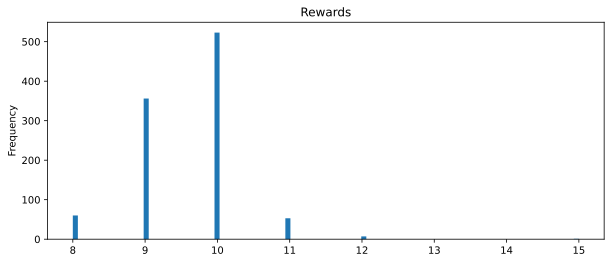

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Good hyper-parameters 👉🏽 
[03_linear_q_agent_good_hyperparameters.ipynb](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/notebooks/03_linear_q_agent_good_hyperparameters.ipynb)

In [62]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


### Environment 🌎

In [63]:
import gym
env = gym.make('CartPole-v1')

### Hyperparameters

In [64]:
# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.0005652080372498697,
    'discount_factor': 0.99,
    'batch_size': 64,
    'memory_size': 100000,
    'freq_steps_train': 128,
    'freq_steps_update_target': 100,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 4,
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.0429612235926375,
    'steps_epsilon_decay': 1000
}

SEED = 2636569667

#### ⚠️ Fix random seeds

In [65]:
from src.utils import set_seed
set_seed(env, SEED)

### QAgent

In [66]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

10 parameters


### Train the agent 🏋️
We repeat the same steps to train the agent, and then we evaluate its performance:

In [67]:
from src.loops import train
train(agent, env, n_episodes=2000)

 10%|█         | 204/2000 [00:08<04:41,  6.39it/s]

Reward mean: 215.39, std: 31.98
Num steps mean: 215.39, std: 31.98


 20%|██        | 402/2000 [00:20<07:23,  3.60it/s]

Reward mean: 325.01, std: 74.61
Num steps mean: 325.01, std: 74.61


 30%|███       | 601/2000 [00:37<12:05,  1.93it/s]

Reward mean: 388.43, std: 78.37
Num steps mean: 388.43, std: 78.37


 40%|████      | 803/2000 [00:50<03:33,  5.61it/s]

Reward mean: 246.66, std: 88.14
Num steps mean: 246.66, std: 88.14


 50%|█████     | 1002/2000 [01:01<03:04,  5.41it/s]

Reward mean: 233.55, std: 76.41
Num steps mean: 233.55, std: 76.41


 60%|██████    | 1203/2000 [01:11<02:20,  5.66it/s]

Reward mean: 214.21, std: 58.58
Num steps mean: 214.21, std: 58.58


 70%|███████   | 1402/2000 [01:20<01:52,  5.31it/s]

Reward mean: 193.29, std: 43.07
Num steps mean: 193.29, std: 43.07


 80%|████████  | 1604/2000 [01:29<01:04,  6.12it/s]

Reward mean: 185.18, std: 40.49
Num steps mean: 185.18, std: 40.49


 90%|█████████ | 1805/2000 [01:38<00:22,  8.81it/s]

Reward mean: 175.02, std: 44.96
Num steps mean: 175.02, std: 44.96


100%|██████████| 2000/2000 [01:46<00:00, 18.78it/s]

Reward mean: 159.43, std: 39.42
Num steps mean: 159.43, std: 39.42


### Evaluate the agent ⏱️

In [68]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|██████████| 1000/1000 [00:11<00:00, 83.67it/s]


In [69]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 164.65, std 39.46


### How far we got in each attempt

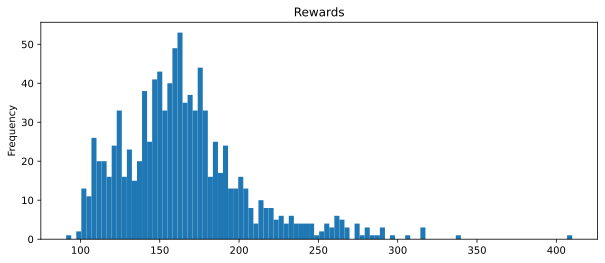

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

### See our agent in action 🎬

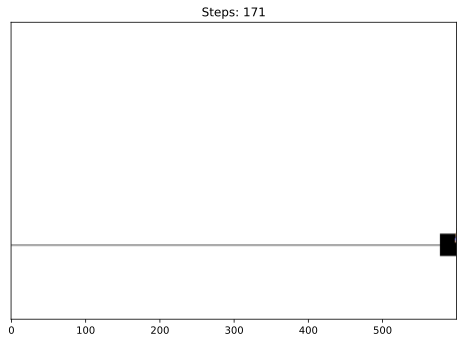

In [71]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)

In [72]:
eval_rewards, eval_steps = evaluate(
    agent, env,
    n_episodes=10,
    epsilon=0.001
)
eval_rewards

100%|██████████| 10/10 [00:00<00:00, 79.45it/s]


[231.0, 148.0, 102.0, 157.0, 116.0, 291.0, 175.0, 176.0, 185.0, 252.0]

## Hyper-parameter sensitivity

Reinforcement Learning agents that use parametric approximations are very sensitive to hyper-parameters. Often, they are also sensitive to the random seed you use to control all sources of randomness during the training.

This makes it very hard to reproduce results published in papers and journals unless ALL hyper-parameters are provided.

There is a great paper about reproducibility in Modern/Deep Reinforcement Learning that I highly recommend you to read

📝 [Deep Reinforcement Learning that Matters](https://arxiv.org/abs/1709.06560)

# 7.. Recap ✨

These are the 3 key takeaways:

* **Parametric $Q$ learning** is a powerful algorithm that combines classic RL (**$Q$-learning**) with function approximation (Supervised ML).

* The parametrization you use is key to ensuring the algorithm converges to an optimal solution. Today we used a linear model, but in the next part, we will use a more flexible model: a neural network.

* Hyper-parameters are critical and can be a deal-breaker.

#8.. Homework 📚 👉🏽 
[04_homework.ipynb](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/notebooks/04_homework.ipynb)

This is what I want you to do:

1. [Git clone](https://github.com/Paulescu/hands-on-rl) the repo to your local machine.
2. [Setup](https://github.com/Paulescu/hands-on-rl/tree/main/02_mountain_car#quick-setup) the environment for this lesson ```03_cart_pole```
3. Open ```03_cart_pole/notebooks/04_homework.ipynb``` and try completing the 2 challenges.

In the first challenge, I want you to try different ```SEED``` values and re-train the agent using the good hyper-parameters I showed you. Do you still get good performance? Or do the results depend a lot on the ```SEED``` you used?

In the second challenge, I ask you to use today’s method and code to solve the ```MountainCar-v0``` environment from [part 3](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-3-5db40e7938d4). Are you able to score $99\%$ score using linear **$Q$-learning**?

#9.. What’s next? ❤️

In the next lesson, we are going to throw in our first deep neural network and create our first **Deep $Q$ Agent**.

Exciting, isn’t it?

Let’s keep on learning together!

==============  Ivan H.P. Lin 2022.08.11 ===========